
## """ Created on Saturday 16 May 2022 """


The series of steps followed are :
1. Importing Packages
2. Reading Data
3. Data Preprocessing
- 3.1 Handling NULL Values
- 3.2 Handling Data Types and Values
4. Analyzing Features
5. Furthur Analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Data/googleplaystore.csv")
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 3. Data Preprocessiong
#### 3.1 Handling Null Values

In [3]:
dataset.isnull().sum()
dataset.dropna(inplace=True)

In [4]:
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

> There are many NULL values in Rating, and few in Type,Content Rating and Versions.

In [5]:
dataset.duplicated().sum()
dataset.drop_duplicates(inplace=True)

> Removing Duplicate entries

In [6]:
dataset.shape

(8886, 13)

#### 3.2 Handling Data Types of each Feature
he data types of each feature must be changed to a proper format that can be used for analysis.

In [7]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

> The feature Reviews must be of numerical type. So we should change it.

In [8]:
dataset.Reviews = dataset.Reviews.astype('int64')

Other Features like Size, Installs, Price and Android Vers also must be of numeric type.
The values they are holding must be changed to a proper format so that we can use them for analysis and plots.
Example : '10000+' to 10000

##### Changing the Feature : installs

In [9]:
newInstalls = []

for row in dataset.Installs:
  row = row[:-1]
  newRow = row.replace(",", "")
  newInstalls.append(float(newRow))

dataset.Installs = newInstalls
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### Changeig the feture size

In [10]:
newSize = []

for row in dataset.Size:
  newRow = row[:-1]
  try:
    newSize.append(float(newRow))
  except:
    newSize.append(0) # when it says - Size varies

dataset.Size = newSize
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### Changeing the feature, Price

In [11]:
newPrice = []

for row in dataset.Price:
  if row != "0":
    newrow = float(row[1:])
  else:
    newrow = 0

  newPrice.append(newrow)

dataset.Price = newPrice
dataset.Price.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

In [12]:
dataset.Price[1:]

1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 8885, dtype: float64

In [13]:
newVer = []

for row in dataset['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  # When the value is - Varies with device
    
    newVer.append(newrow)
    
dataset['Android Ver'] =  newVer

dataset['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

In [14]:
dataset['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

## 4. Analyzing Features.

> Displaying all the categories and their count

In [15]:
dataset.Category.value_counts()

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

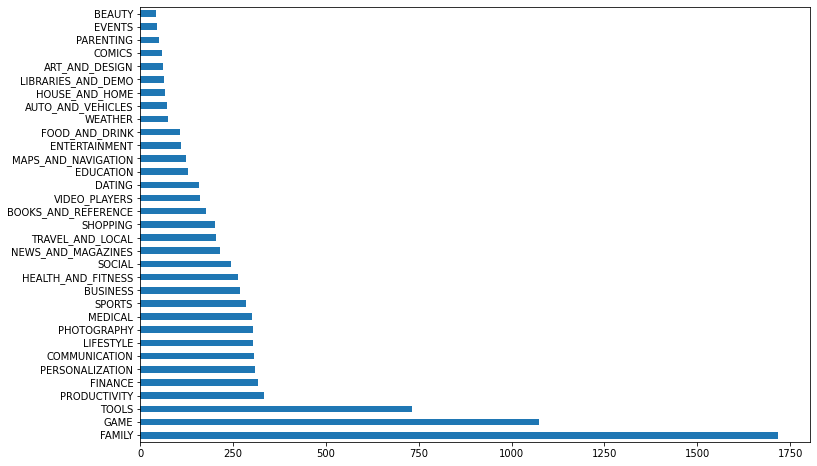

In [16]:
dataset.Category.value_counts().plot(kind='barh',figsize= (12,8))

> **Insight** : Maximum Number of Apps belong to the Family and Game Category.

4.2 Rating

In [17]:
dataset.Rating.describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

> Distribution Plot of `Rating`

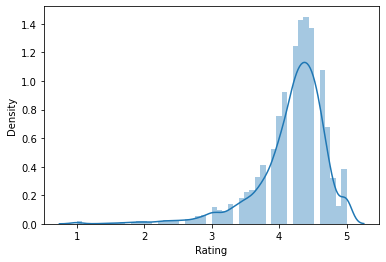

In [18]:
sns.distplot(dataset.Rating)

> **Insight :** Most of the apps, clearly hold a rating above 4.0 ! And surprisingly a lot seem to have 5.0 rating.

In [19]:
print("No. of App with full ratings :", dataset.Rating[dataset['Rating'] == 5].count())

No. of App with full ratings : 271


> There are 271 Apps in the store which hold 5.0 Ratings. Do all of these actually deserve it? Or are these spammed ratings? Lets analyze furthur.

4.3 Consider the Reviews:

> Distribution Plot of the feature 'Reviews'

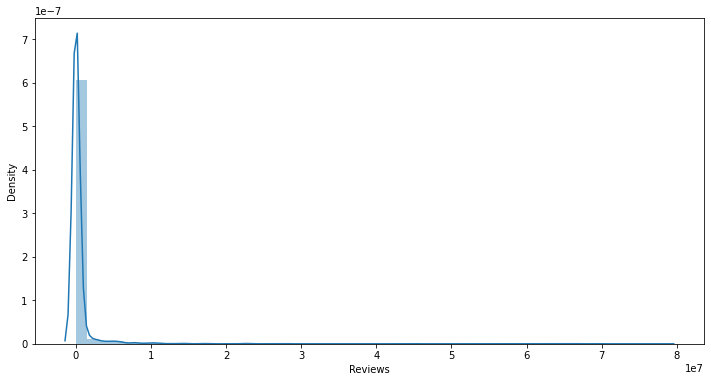

In [20]:
plt.figure(figsize=(12, 6))
sns.distplot(dataset.Reviews)

> Let's look into those apps which have a good amount of Reviews.

In [21]:
dataset[dataset.Reviews > 40000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
1670,Clash of Clans,GAME,4.6,44891723,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
1879,Clash of Clans,GAME,4.6,44893888,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
2544,Facebook,SOCIAL,4.1,78158306,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,0.0
2545,Instagram,SOCIAL,4.5,66577313,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
3909,Instagram,SOCIAL,4.5,66509917,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0


**Insight :** The most famous Apps like WhatsApp, Facebook and Clash of Clans are the most reviewed Apps as shown above.

**Note :** And I still have to figure out, how to remove the duplicate entries. My Apologies.

In [22]:
dataset.sort_values("App", inplace = True)
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22.0,1000000.0,Free,0.00,Everyone,Social,"August 2, 2018",5.03,4.0
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1,10000.0,Free,0.00,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0
4541,.R,TOOLS,4.5,259,203.0,10000.0,Free,0.00,Everyone,Tools,"September 16, 2014",1.1.06,1.0
4636,/u/app,COMMUNICATION,4.7,573,53.0,10000.0,Free,0.00,Mature 17+,Communication,"July 3, 2018",4.2.4,4.0
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14.0,100.0,Free,0.00,Everyone,News & Magazines,"July 6, 2018",1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,감성학원 BL 첫사랑,COMICS,4.4,190,34.0,10000.0,Free,0.00,Everyone,Comics,"November 17, 2017",3.2.1,3.0
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.0
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18.0,1000000.0,Free,0.00,Everyone,Social,"July 24, 2018",4.2.4,4.0
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2,10000.0,Free,0.00,Everyone,Tools,"October 21, 2017",1.0,4.0


In [23]:
len(dataset)

8886

In [24]:
dataset.drop_duplicates(subset ="App",
                     keep = False, inplace = True)

In [25]:
len(dataset)

7669

#### i found it how to remove the duplicate entries. 
>  Thanks for: geeksforgeeks.org/python-pandas-dataframe-drop_duplicates

4.4 Type

([<matplotlib.patches.Wedge at 0x7f72e28a82d0>,
 [Text(-1.0679197624438952, 0.26371837437269097, 'Free'),
  Text(1.067919762443895, -0.2637183743726916, 'Paid')],
 [Text(-0.5825016886057609, 0.14384638602146776, '92.3%'),
  Text(0.5825016886057609, -0.1438463860214681, '7.7%')])

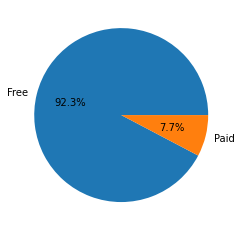

In [26]:
plt.pie(dataset.Type.value_counts(),labels=['Free', 'Paid'], autopct = '%1.1f%%')

**Insight :** 92.3 % of the app are free in the Play Store.

4.5 Price

In [27]:
dataset[dataset.Price == dataset.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.0


**Insight :** The most costly App in the Store is: I'm Rich - Trump Edition costing 400 Dollars!

4.6 Android Version

In [28]:
dataset['Android Ver'] = dataset['Android Ver'].astype('int64')

In [29]:
dataset['Android Ver'].value_counts()

4    4930
2    1105
0     768
5     438
3     234
1     104
7      45
6      40
8       5
Name: Android Ver, dtype: int64

> Count Plot of the various Versions

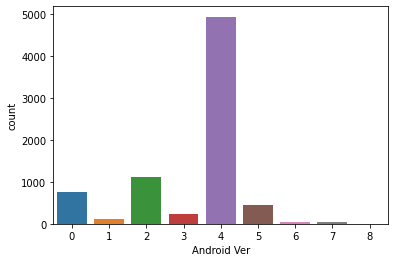

In [30]:
sns.countplot(dataset['Android Ver'])

**Insight :** Most of the apps support Android 4.0 and above.

In [31]:
dataset_full = dataset[dataset.Rating == 5]
dataset_full.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7466,211:CK,GAME,5.0,8,38.0,10.0,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4
8018,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1,3.7,10.0,Paid,1.49,Everyone,Education,"May 18, 2018",2.0.2,2
2522,420 BZ Budeze Delivery,MEDICAL,5.0,2,11.0,100.0,Free,0.00,Mature 17+,Medical,"June 6, 2018",1.0.1,4
5828,A-Y Collection,SHOPPING,5.0,2,2.9,100.0,Free,0.00,Teen,Shopping,"February 16, 2018",1.2,4
8287,AC DC Power Monitor,LIFESTYLE,5.0,1,1.2,10.0,Paid,3.04,Everyone,Lifestyle,"May 29, 2016",1.2,2


> Distribution plot of 'Installs' of Apps with 5.0 Ratings

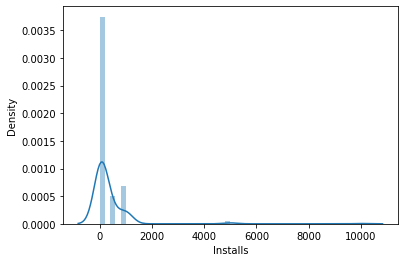

In [32]:
sns.distplot(dataset_full.Installs);

In [33]:
dataset_full.Installs.value_counts().sort_index()

1.0          3
5.0          8
10.0        48
50.0        32
100.0      112
500.0       27
1000.0      37
5000.0       3
10000.0      1
Name: Installs, dtype: int64

**Insight :** There are many Apps that have full ratings but less downloads/installs. So we can't really consider those apps as the best ones.

Consider the Apps with 5.0 Ratings and Maximum Installs :

In [34]:
dataset_full_maxinstalls = dataset_full[dataset.Installs > 1000]
dataset_full_maxinstalls[['App', 'Category', 'Installs']]

,App,Category,Installs
7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5000.0
9511,Ek Bander Ne Kholi Dukan,FAMILY,10000.0
8058,Oración CX,LIFESTYLE,5000.0
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5000.0


Checking the No. of Reviews of 5.0 Rating Apps

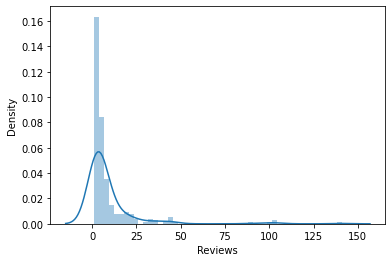

In [35]:
sns.distplot(dataset_full.Reviews)

> The above distribution is clearly skewed. Apps with very few reviews easily managed to get 5.0 ratings which can be misleading.
So let's filter out the ones with more than 30 reviews. These filtered ones are the apps that really stand for 5.0 rating.

In [37]:
dataset_full = dataset[dataset.Reviews > 30]
dataset_full.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22.0,1000000.0,Free,0.0,Everyone,Social,"August 2, 2018",5.03,4
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1,10000.0,Free,0.0,Mature 17+,Comics,"July 13, 2018",5.0.12,5
4541,.R,TOOLS,4.5,259,203.0,10000.0,Free,0.0,Everyone,Tools,"September 16, 2014",1.1.06,1
4636,/u/app,COMMUNICATION,4.7,573,53.0,10000.0,Free,0.0,Mature 17+,Communication,"July 3, 2018",4.2.4,4
10252,1. FC Köln App,SPORTS,4.6,2019,41.0,100000.0,Free,0.0,Everyone,Sports,"July 20, 2018",1.13.0,4


In [39]:
print("No. of Apps having 5.0 Rating with sufficient Reviews: ",dataset_full.App.count())

No. of Apps having 5.0 Rating with sufficient Reviews:  6481


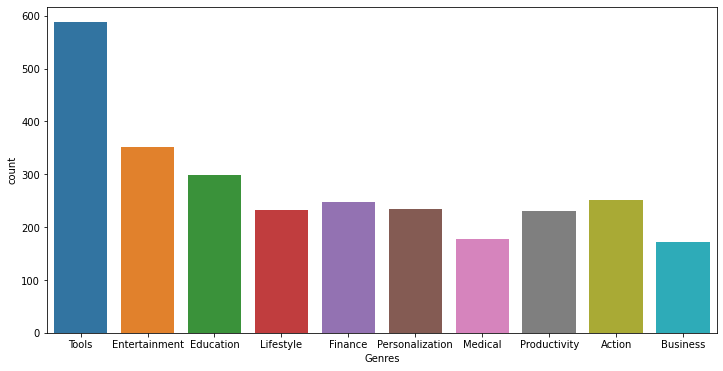

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(dataset_full.Genres, order=dataset.Genres.value_counts().iloc[:10].index)


**Insight :** Apps related to Tools, LifeStyle and Tools seem to fetch full Ratings with sufficient number of reviews.

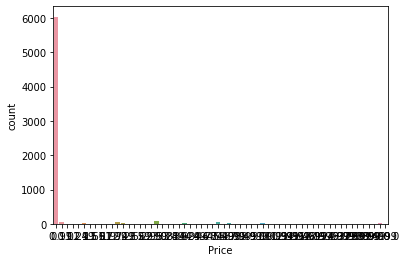

In [54]:
sns.countplot(dataset_full.Price)